In [1]:
import tensorflow as tf

In [ ]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("C:/Users/User/Desktop/mnist", one_hot=True)

In [3]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000256279A5898>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002562790DE48>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002562790DE10>)

In [4]:
img = mnist.train.images
labels = mnist.train.labels

import matplotlib.pyplot as plt

batch = mnist.train.images


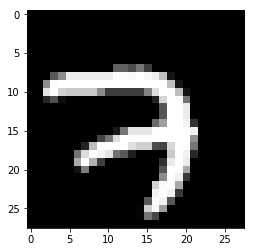

In [5]:
plotData = batch[0]
plotData = plotData.reshape(28, 28)
plt.gray() # use this line if you don't want to see it in color
plt.imshow(plotData)
plt.show()

In [6]:
labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [72]:
# Training Parameters

learning_rate = 0.001
num_steps = 1000
batch_size = 32
display_steps = 50

#Network parameters

num_input = 784 # (img shape : 28 * 28)
num_classes = 10 #(0-9 digits)
dropout = 0.75

# tf graph input 
X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_classes])

keep_prob = tf.placeholder(tf.float32) # dropout

In [73]:
# Wrapper for simplicity
def conv2d(x, W, b, strides = 1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    
    return tf.nn.relu(x)

In [74]:
def maxpool2d(x, k=2):
    # Maxpooling
    
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

In [75]:
def conv_net(x, weights, biases, dropout): 
    x = tf.reshape(x, shape=[-1, 28, 28, 1])
    
    #conv layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max pooling
    conv1 = maxpool2d(conv1, k=2)
    
    #conv layer2
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max pooling
    conv2 = maxpool2d(conv1, k=2)
    
    # Full connected layer 
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    
    # Applying Dropout
    fc1 = tf.nn.dropout(fc1, dropout)
    # Output class predction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    
    return out

In [76]:
# storing layers, weights and bias

weights = {
    # 5 x 5 conv, 1 input, 32 output
    'wc1' : tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'wc2' : tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # Fully connected, 7*7*64 inputs, 1024 outputs
    'wd1' : tf.Variable(tf.random_normal([7*7*32, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out' : tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bc1' : tf.Variable(tf.random_normal([32])),
    'bc2' : tf.Variable(tf.random_normal([64])),
    'bd1' : tf.Variable(tf.random_normal([1024])),
    'out' : tf.Variable(tf.random_normal([num_classes])),
}

In [77]:
# Construct Model
logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

# Calc loss and optimization
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Eval model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.global_variables_initializer()



In [78]:
# Start training
# Run the initializer
saver = tf.train.Saver()

with tf.Session() as sess:
    
    sess.run(init)
    dict_value = {}
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_steps == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y,
                                                                 keep_prob: 1.0})
            dict_value[step] = acc
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for 256 MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels,
                                      keep_prob: 1.0}))

    
    saver.save(sess, './my_mnist_model.ckpt',global_step=1000)


Step 1, Minibatch Loss= 2870.6765, Training Accuracy= 0.125
Step 50, Minibatch Loss= 328.0525, Training Accuracy= 0.500
Step 100, Minibatch Loss= 40.5061, Training Accuracy= 0.906
Step 150, Minibatch Loss= 91.7284, Training Accuracy= 0.844
Step 200, Minibatch Loss= 62.3163, Training Accuracy= 0.844
Step 250, Minibatch Loss= 87.7057, Training Accuracy= 0.875
Step 300, Minibatch Loss= 80.8447, Training Accuracy= 0.844
Step 350, Minibatch Loss= 36.8112, Training Accuracy= 0.906
Step 400, Minibatch Loss= 95.2685, Training Accuracy= 0.938
Step 450, Minibatch Loss= 148.9629, Training Accuracy= 0.875
Step 500, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 550, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 600, Minibatch Loss= 22.8998, Training Accuracy= 0.938
Step 650, Minibatch Loss= 30.1406, Training Accuracy= 0.969
Step 700, Minibatch Loss= 51.1384, Training Accuracy= 0.938
Step 750, Minibatch Loss= 88.5917, Training Accuracy= 0.906
Step 800, Minibatch Loss= 105.0775, Train

In [79]:
saver = tf.train.Saver()

def pred():
    from PIL import Image
    import PIL.ImageOps
    from scipy.misc import imresize
    import numpy as np
    img = Image.open('img.jpg')

    im = PIL.ImageOps.invert(img)
    im = imresize(im,(28,28))
    im = np.mean(im, axis = 2)
    return im

with tf.Session() as sess:
    saver.restore(sess,'./my_mnist_model.ckpt-1000')
    im = pred()
    print(sess.run(prediction, feed_dict = {X:im.reshape(1,-1), keep_prob:1.0}))
    
    
    

INFO:tensorflow:Restoring parameters from ./my_mnist_model.ckpt-1000
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # This is added back by InteractiveShellApp.init_path()


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


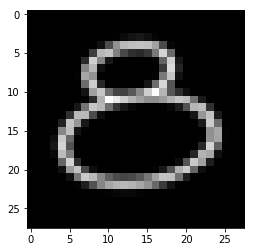

In [70]:
def pred():
    from PIL import Image
    import PIL.ImageOps
    from scipy.misc import imresize
    import numpy as np
    img = Image.open('img.jpg')

    im = PIL.ImageOps.invert(img)
    im = imresize(im,(28,28))
    im = np.mean(im, axis = 2)
    return im
im = pred()
plt.imshow(im)


In [ ]:
pwd


In [ ]:
sess.run(accuracy, feed_dict={X:im.reshape(1,-1),
                                  Y: mnist.test.labels,
                                  keep_prob: 1.0})

In [ ]:
    sess.run(accuracy, feed_dict={X: mnist.test.images,
                                  Y: mnist.test.labels,
                                  keep_prob: 1.0})

In [ ]:
lists = sorted(dict_value.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()